Importing SNP 500 stocks

In [78]:
import numpy as np
import pandas as pd 
df_raw=pd.read_excel('snp500.xlsx', header=[0,1])

Creat the pct change and rolling net buyers


In [119]:

import unicodedata
df = df_raw
ticks = df.columns.get_level_values(0).unique().tolist()
ticks.remove('Unnamed: 0_level_0')

for ticker in ticks:
    
    if df[(ticker, 'DIVIDEND_INDICATED_YIELD')].empty:
        continue
    
    df_rolling_net_buyers =df[df[(ticker, 'NET_BUYERS')].notna()]
    rolling_net_buyers = df_rolling_net_buyers[(ticker, 'NET_BUYERS')].rolling(window=5).mean()
    df[(ticker, f'NET_BUYERS_ROLLING_{5}W')] = rolling_net_buyers


    rolling_max_yield = (df[(ticker, 'YILD_PCT_CHANGE')].rolling(window=6).apply(lambda x: x[np.argmax(np.abs(x))], raw=True)
)
    df[(ticker, f'Max_yied{5}D')] = rolling_max_yield

key = ('A UN', f'NET_BUYERS_ROLLING_{35}D')
df = df[df[key].notna()]
df.to_excel('x.xlsx')


Take dates with large pct change yields only

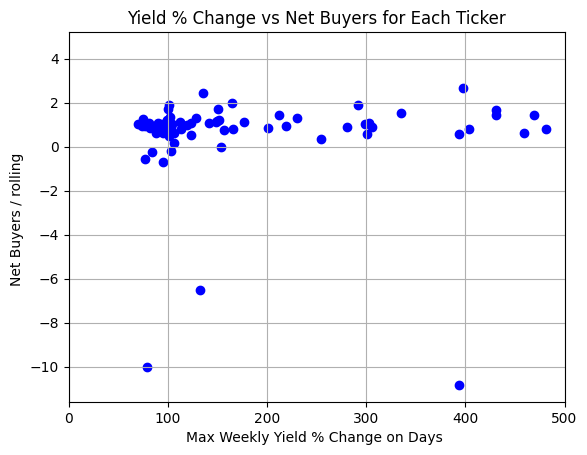

88 increase
21 decrease


In [145]:

import matplotlib.pyplot as plt
paris= []
count_yiled_increase = 0
count_yiled_decrease = 0
for ticker in ticks:
    x = df[(ticker, f'Max_yied{5}D')]
    y = df[(ticker, 'NET_BUYERS')]/df[(ticker, f'NET_BUYERS_ROLLING_{5}W')]

    limits = abs(x) >= 70
    x_filtered = x[limits]
    y_filtered = y[limits]
    
    direction_filter = x >= 0
    x_poistive = x_filtered [direction_filter]
    y_xpo = y_filtered [direction_filter]

    direction_filter2 = x<0
    x_negative = x_filtered [direction_filter2]
    y_xna = y_filtered [direction_filter2]

    plt.scatter(x_poistive, y_xpo, label=ticker, color='blue')  # Scatter plot for each ticker
    plt.scatter(x_negative, y_xna, label=ticker, color='green')

    count_yiled_increase += len(x_poistive) 
    count_yiled_decrease +=len(x_negative)
    # plt.scatter(x_filtered, y_filtered, label=ticker)  # Scatter plot for each ticker

plt.xlabel('Max Weekly Yield % Change on Days ')
plt.ylabel('Net Buyers / rolling ')
plt.title('Yield % Change vs Net Buyers for Each Ticker')
plt.xlim(0,500)
# plt.legend
plt.grid(True)
plt.show()
print(count_yiled_increase,'increase')
print(count_yiled_decrease,'decrease')

In [122]:
print(df.columns)

MultiIndex([('Unnamed: 0_level_0',       'Unnamed: 0_level_1'),
            (              'A UN', 'DIVIDEND_INDICATED_YIELD'),
            (              'A UN',            'EQY_INST_BUYS'),
            (              'A UN',           'EQY_INST_SELLS'),
            (              'A UN',          'YILD_PCT_CHANGE'),
            (              'A UN',               'NET_BUYERS'),
            (           'AAPL UW', 'DIVIDEND_INDICATED_YIELD'),
            (           'AAPL UW',            'EQY_INST_BUYS'),
            (           'AAPL UW',           'EQY_INST_SELLS'),
            (           'AAPL UW',          'YILD_PCT_CHANGE'),
            ...
            (            'WST UN',    'NET_BUYERS_ROLLING_5W'),
            (            'WTW UW',    'NET_BUYERS_ROLLING_5W'),
            (             'WY UN',    'NET_BUYERS_ROLLING_5W'),
            (           'WYNN UW',    'NET_BUYERS_ROLLING_5W'),
            (            'XEL UW',    'NET_BUYERS_ROLLING_5W'),
            (           